# Etapa 2: Análisis exploratorio de los datos

<p align="justify"> En esta segunda etapa se realizará una exploración de los datos procesados en la etapa anterior. La exploración irá acompañada de visualizaciones que ayuden a comprender los datos y las relaciones entre ellos. Tambien se busca que a partir de esta exploración se planteen múltiples hipotesis y preguntas que seran analizadas con más detenimiento en futuras etapas.

In [96]:
# Montamos la unidad de Google Drive.
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/TFM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TFM


In [97]:
!pip install lifelines
!pip install tableone
!pip install pingouin

In [98]:
# Importamos módulos necesarios.
import pandas as pd
import numpy as np
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from lifelines import KaplanMeierFitter
from tableone import TableOne

from utils import read_data

# Aplicamos configuración sobre la visualización de los DataFrames.
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme()

# Ruta de los archivos de origen.
input_path = 'data/processed/'

In [99]:
# Carga de todos los datos.
demographic = read_data(f'{input_path}demographic.csv')
diagnosis_prior = read_data(f'{input_path}diagnosis_prior.csv')
diagnosis_primary = read_data(f'{input_path}diagnosis_primary.csv')
diagnosis_other = read_data(f'{input_path}diagnosis_other.csv')
diagnosis_type = read_data(f'{input_path}diagnosis_type.csv')
treatment_ebrt = read_data(f'{input_path}treatment_ebrt.csv')
treatment_chemo = read_data(f'{input_path}treatment_chemo.csv')
treatment_type = read_data(f'{input_path}treatment_type.csv')
mutation_gene = read_data(f'{input_path}mutation_gene.csv')

## 1. Análisis exploratorio de demographic

In [100]:
# Muestra de los datos.
demographic.head()

,Patient Id,Age,Country Of Residence,Ethnicity,Gender,Race,Diabetes,Chronic Pancreatitis,Alcohol History,Alcohol Intensity,Tobacco Smoking Status,Relative With Cancer,Relative Cancer Type,Vital Status,Overall Survival
0,TCGA-IB-7897,53,Canada,not hispanic or latino,female,white,No,No,Yes,Social Drinker,"Current Reformed Smoker, Duration Not Specified",yes,Melanoma,1,486
1,TCGA-HZ-8315,54,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,299
2,TCGA-HZ-8636,58,United States,not hispanic or latino,female,white,No,No,NaN,NaN,NaN,NaN,NaN,1,545
3,TCGA-IB-7888,66,Canada,not hispanic or latino,female,black or african american,No,No,NaN,NaN,NaN,NaN,NaN,1,1332
4,TCGA-IB-7893,64,Canada,not hispanic or latino,male,white,Yes,No,Yes,Social Drinker,Current Reformed Smoker for > 15 yrs,yes,Cancer,1,117


In [101]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient Id              185 non-null    object
 1   Age                     185 non-null    int64 
 2   Country Of Residence    185 non-null    object
 3   Ethnicity               142 non-null    object
 4   Gender                  185 non-null    object
 5   Race                    180 non-null    object
 6   Diabetes                185 non-null    object
 7   Chronic Pancreatitis    185 non-null    object
 8   Alcohol History         99 non-null     object
 9   Alcohol Intensity       99 non-null     object
 10  Tobacco Smoking Status  149 non-null    object
 11  Relative With Cancer    113 non-null    object
 12  Relative Cancer Type    64 non-null     object
 13  Vital Status            185 non-null    int64 
 14  Overall Survival        185 non-null    int64 
dtypes: int

In [102]:
# Realizamos una descripción estadística básica de las variables.
demographic.describe(include='all')

,Patient Id,Age,Country Of Residence,Ethnicity,Gender,Race,Diabetes,Chronic Pancreatitis,Alcohol History,Alcohol Intensity,Tobacco Smoking Status,Relative With Cancer,Relative Cancer Type,Vital Status,Overall Survival
count,185,185.000000,185,142,185,180,185,185,99,99,149,113,64,185.000000,185.000000
unique,185,NaN,8,2,2,3,2,2,2,5,5,2,4,NaN,NaN
top,TCGA-IB-7897,NaN,United States,not hispanic or latino,male,white,No,No,Yes,Non-Drinker,Lifelong Non-Smoker,yes,Cancer,NaN,NaN
freq,1,NaN,122,137,102,162,147,172,70,29,69,66,44,NaN,NaN
mean,NaN,64.854054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.610811,566.378378
std,NaN,11.039223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.488889,472.816041
min,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,277.000000
50%,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,467.000000
75%,NaN,73.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,676.000000


In [103]:
pg.normality(demographic, method='shapiro')

,W,pval,normal
Age,0.984399,3.747712e-02,False
Vital Status,0.618311,4.190146e-20,False
Overall Survival,0.820710,8.125694e-14,False


In [104]:
columns = demographic.columns.difference(['Patient Id', 'Vital Status', 'Overall Survival'])
categorical = columns.difference(['Age'])

table1 = TableOne(demographic, columns=columns.to_list(), categorical=categorical.to_list(),
                  pval=False, missing=False, nonnormal=['Age'])

print(table1.tabulate(tablefmt="fancy_grid"))
table1.to_csv("Table1_demographics.csv")

╒═══════════════════════════════╤═════════════════════════════════════════════════╤══════════════════╕
│                               │                                                 │ Overall          │
╞═══════════════════════════════╪═════════════════════════════════════════════════╪══════════════════╡
│ n                             │                                                 │ 185              │
├───────────────────────────────┼─────────────────────────────────────────────────┼──────────────────┤
│ Age, median [Q1,Q3]           │                                                 │ 65.0 [57.0,73.0] │
├───────────────────────────────┼─────────────────────────────────────────────────┼──────────────────┤
│ Alcohol History, n (%)        │ No                                              │ 29 (15.7)        │
├───────────────────────────────┼─────────────────────────────────────────────────┼──────────────────┤
│                               │ None                                   

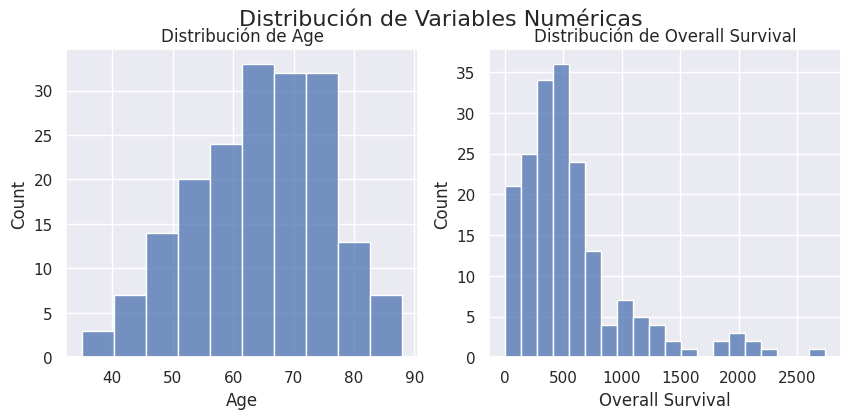

In [105]:
numeric_cols = ['Age', 'Overall Survival']

fig, ax = plt.subplots(1, len(numeric_cols), figsize=(10, 4))

for i in range(len(numeric_cols)):
    col = numeric_cols[i]
    sns.histplot(data=demographic, x=col, ax=ax[i])
    ax[i].set_title(f'Distribución de {col}')

plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

## 2. Análisis exploratorio de diagnosis_prior

In [106]:
# Muestra de los datos.
diagnosis_prior.head()

,Patient Id,Primary Diagnosis,Tissue Or Organ Of Origin
0,TCGA-HZ-7289,Carcinoma,Skin
1,TCGA-F2-A44G,Infiltrating Duct Carcinoma,Breast
2,TCGA-3A-A9IL,Adenoma,Pituitary Gland
3,TCGA-3A-A9IL,Melanoma,Lower Limb
4,TCGA-IB-A5SS,Basal Cell Carcinoma,Skin


In [107]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
diagnosis_prior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Id                 23 non-null     object
 1   Primary Diagnosis          21 non-null     object
 2   Tissue Or Organ Of Origin  23 non-null     object
dtypes: object(3)
memory usage: 684.0+ bytes


In [108]:
# Realizamos una descripción estadística básica de las variables.
diagnosis_prior.describe(include='all')

,Patient Id,Primary Diagnosis,Tissue Or Organ Of Origin
count,23,21,23
unique,19,12,12
top,TCGA-3A-A9IL,Melanoma,Skin
freq,2,4,4


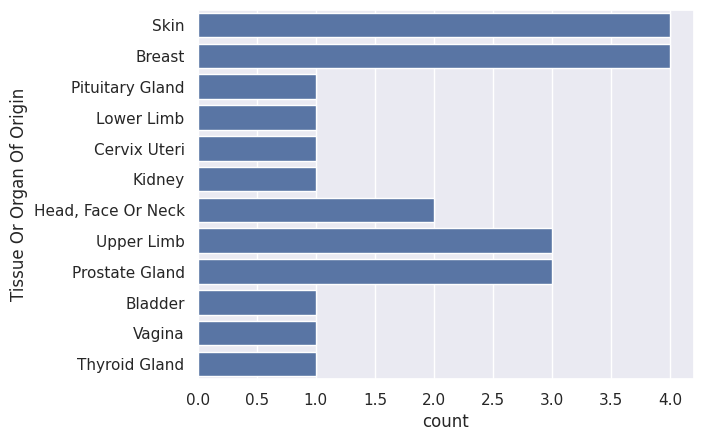

In [109]:
sns.countplot(data=diagnosis_prior, y='Tissue Or Organ Of Origin')
plt.show()

## 3. Análisis exploratorio de diagnosis_primary

In [110]:
# Muestra de los datos.
diagnosis_primary.head()

,Patient Id,Ajcc Pathologic Stage,Ajcc Pathologic T,Ajcc Pathologic N,Ajcc Pathologic M,Primary Diagnosis,Residual Disease,Sites Of Involvement,Tumor Grade,Year Of Diagnosis,Lymph Nodes Positive,Maximum Tumor Diameter (cm),Ajcc Pathologic N 8th,Ajcc Pathologic T 8th,Ajcc Pathologic Stage 8th,Gene Mutations
0,TCGA-IB-7897,Stage II,T3,N1,M0,Infiltrating Duct Carcinoma,R0,Pancreas Head,G2,2008.0,2.0,3.5,N1,T2,Stage II,NaN
1,TCGA-HZ-8315,Stage II,T3,N0,MX,Infiltrating Duct Carcinoma,R1,Pancreas Head,G2,2012.0,0.0,6.0,N0,T3,Stage II,NaN
2,TCGA-HZ-8636,Stage IV,T3,N0,M1,Infiltrating Duct Carcinoma,R1,Pancreas Tail,G3,2012.0,0.0,9.0,N0,T3,Stage IV,NaN
3,TCGA-IB-7888,Stage II,T3,N0,M0,Infiltrating Duct Carcinoma,R0,Pancreas Head,G2,2008.0,0.0,3.0,N0,T2,Stage I,NaN
4,TCGA-IB-7893,Stage II,T3,N0,M0,Infiltrating Duct Carcinoma,R0,Pancreas Body,G3,2009.0,0.0,7.0,N0,T3,Stage II,NaN


In [111]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
diagnosis_primary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Patient Id                   185 non-null    object 
 1   Ajcc Pathologic Stage        181 non-null    object 
 2   Ajcc Pathologic T            184 non-null    object 
 3   Ajcc Pathologic N            184 non-null    object 
 4   Ajcc Pathologic M            185 non-null    object 
 5   Primary Diagnosis            185 non-null    object 
 6   Residual Disease             173 non-null    object 
 7   Sites Of Involvement         185 non-null    object 
 8   Tumor Grade                  185 non-null    object 
 9   Year Of Diagnosis            184 non-null    float64
 10  Lymph Nodes Positive         181 non-null    float64
 11  Maximum Tumor Diameter (cm)  170 non-null    float64
 12  Ajcc Pathologic N 8th        185 non-null    object 
 13  Ajcc Pathologic T 8t

In [112]:
# Realizamos una descripción estadística básica de las variables.
diagnosis_primary.describe(include='all')

,Patient Id,Ajcc Pathologic Stage,Ajcc Pathologic T,Ajcc Pathologic N,Ajcc Pathologic M,Primary Diagnosis,Residual Disease,Sites Of Involvement,Tumor Grade,Year Of Diagnosis,Lymph Nodes Positive,Maximum Tumor Diameter (cm),Ajcc Pathologic N 8th,Ajcc Pathologic T 8th,Ajcc Pathologic Stage 8th,Gene Mutations
count,185,181,184,184,185,185,173,185,185,184.000000,181.000000,170.000000,185,185,185,126.000000
unique,185,4,5,4,3,6,4,8,5,NaN,NaN,NaN,4,4,4,NaN
top,TCGA-IB-7897,Stage II,T3,N1,MX,Infiltrating Duct Carcinoma,R0,Pancreas Head,G2,NaN,NaN,NaN,N1,T2,Stage II,NaN
freq,1,152,148,126,95,150,111,147,97,NaN,NaN,NaN,77,101,89,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.032609,2.988950,3.840000,NaN,NaN,NaN,84.619048
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.016062,3.444785,1.705661,NaN,NaN,NaN,173.595016
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.000000,0.000000,0.300000,NaN,NaN,NaN,23.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.000000,0.000000,2.925000,NaN,NaN,NaN,50.250000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,2.000000,3.500000,NaN,NaN,NaN,63.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,4.000000,4.500000,NaN,NaN,NaN,81.750000


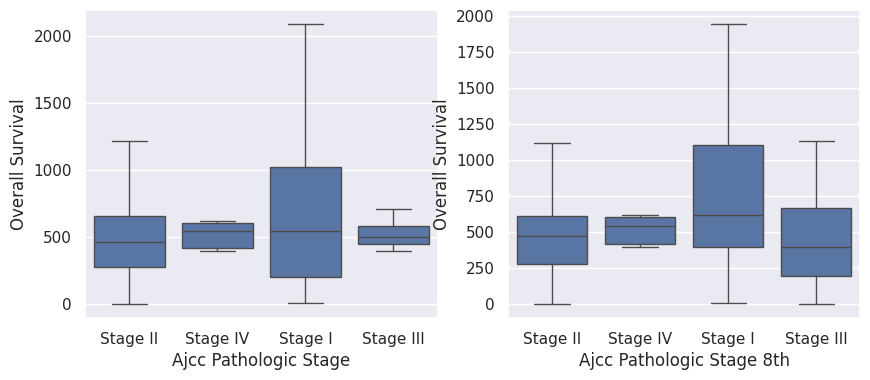

In [113]:
diagnosis_primary = diagnosis_primary.merge(demographic[['Patient Id', 'Overall Survival']], on='Patient Id', how='left')

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.boxplot(data=diagnosis_primary, y='Overall Survival', x='Ajcc Pathologic Stage', ax=ax[0], showfliers=False)
sns.boxplot(data=diagnosis_primary, y='Overall Survival', x='Ajcc Pathologic Stage 8th', ax=ax[1], showfliers=False)
plt.show()

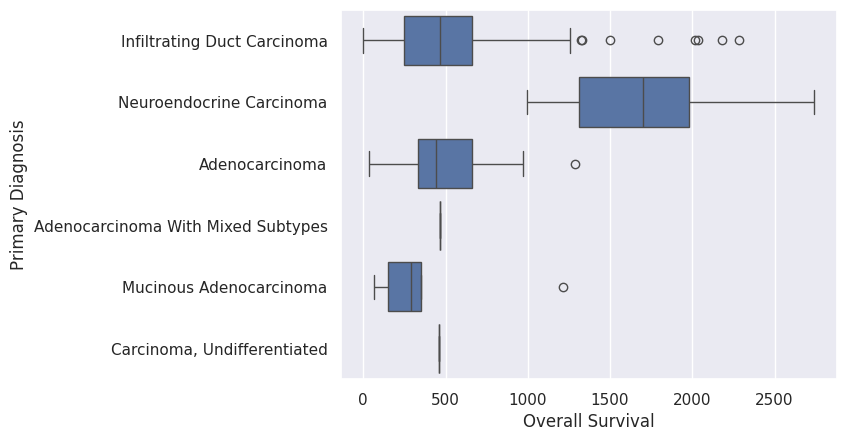

In [114]:
sns.boxplot(data=diagnosis_primary, x='Overall Survival', y='Primary Diagnosis')
plt.show()

In [119]:
df_etapas = diagnosis_primary[['Ajcc Pathologic Stage', 'Ajcc Pathologic Stage 8th']].copy()

df_etapas['Stage_7th'] = df_etapas['Ajcc Pathologic Stage'].astype(str) + ' (7th Ed.)'
df_etapas['Stage_8th'] = df_etapas['Ajcc Pathologic Stage 8th'].astype(str) + ' (8th Ed.)'

df_flujo = df_etapas.groupby(['Stage_7th', 'Stage_8th']).size().reset_index(name='Value')
df_flujo.rename(columns={'Stage_7th': 'Source', 'Stage_8th': 'Target'}, inplace=True)

all_nodes = list(pd.concat([df_flujo['Source'], df_flujo['Target']]).unique())

node_map = {name: i for i, name in enumerate(all_nodes)}

source_indices = df_flujo['Source'].map(node_map).tolist()
target_indices = df_flujo['Target'].map(node_map).tolist()
values = df_flujo['Value'].tolist()

totales_source = df_flujo.groupby('Source')['Value'].sum()
totales_target = df_flujo.groupby('Target')['Value'].sum()
totales = totales_source.add(totales_target, fill_value=0)

node_labels = [
    f"{name.replace(' (7th Ed.)','').replace(' (8th Ed.)','')}\n(n={int(totales.get(name, 0))})"
    for name in all_nodes]

fig = go.Figure(data=[go.Sankey(node=dict(pad=15, thickness=20, line=dict(color="black", width=0.5),
                                          label=node_labels, hovertemplate='Nodo: %{label}<extra></extra>'),
                                link=dict(source=source_indices, target=target_indices, value=values,
                                          hovertemplate='Flujo: %{source.label} -> %{target.label}<br>Pacientes: %{value}<extra></extra>'))])

fig.update_layout(title_text="Reclasificación de Estadios Patológicos (7ª Edición a 8ª Edición)",
    font=dict(size=10, color='black'), width=800, height=600,
    annotations=[dict(xref='paper', yref='paper', x=0.05, y=1.05, text='Estadios - 7ª Edición',
                      showarrow=False, font=dict(size=12, color='blue')),
        dict(xref='paper', yref='paper', x=0.95, y=1.05, text='Estadios - 8ª Edición',
            showarrow=False,font=dict(size=12, color='red'))])

fig.show()

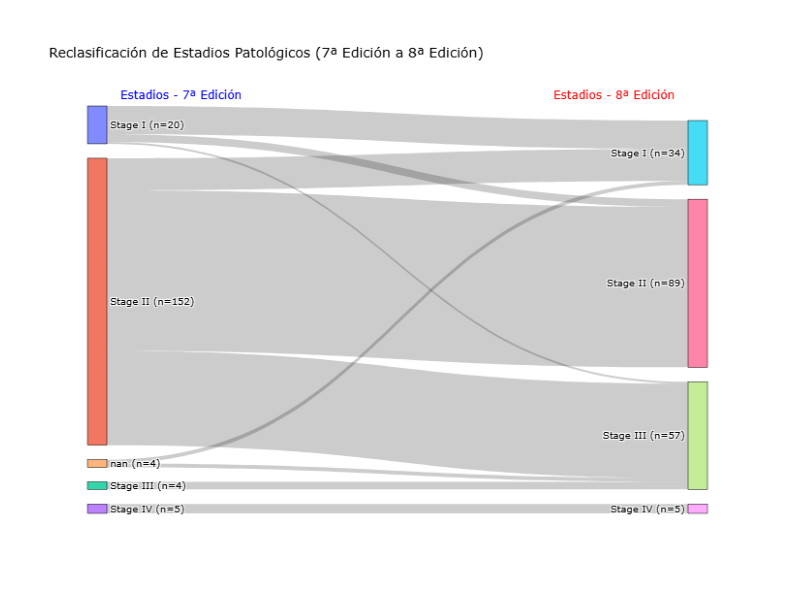

In [120]:
im = plt.imread('images/Estadios patologicos.png', format='png')
plt.figure(figsize=(10, 10))
plt.imshow(im)
plt.axis('off')
plt.show()

In [121]:
# Total por estadio origen (7ª edición)
total_origen = df_flujo.groupby('Source')['Value'].sum()

# Porcentaje de reclasificación
df_flujo['Percent'] = (
    df_flujo['Value'] / df_flujo['Source'].map(total_origen) * 100
)

tabla_detallada = (
    df_flujo
    .copy()
    [['Source', 'Target', 'Value', 'Percent']]
    .sort_values(['Source'])
)

tabla_detallada.columns = ['7a Edición', '8a Edición', 'Total', 'Porcentaje']
tabla_detallada['7a Edición'] = tabla_detallada['7a Edición'].str.replace(' (7th Ed.)', '', regex=False)
tabla_detallada['8a Edición'] = tabla_detallada['8a Edición'].str.replace(' (8th Ed.)', '', regex=False)

tabla_detallada

,7a Edición,8a Edición,Total,Porcentaje
0,Stage I,Stage I,15,75.000000
1,Stage I,Stage II,4,20.000000
2,Stage I,Stage III,1,5.000000
3,Stage II,Stage I,17,11.184211
4,Stage II,Stage II,85,55.921053
5,Stage II,Stage III,50,32.894737
6,Stage III,Stage III,4,100.000000
7,Stage IV,Stage IV,5,100.000000
8,nan,Stage I,2,50.000000
9,nan,Stage III,2,50.000000


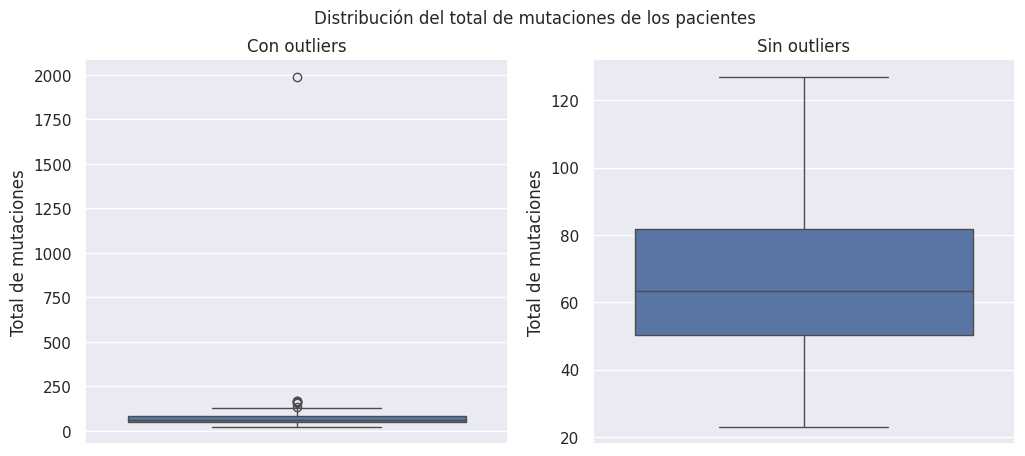

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[0])
sns.boxplot(data=diagnosis_primary, y='Gene Mutations', ax=ax[1], showfliers=False)

ax[0].set_title('Con outliers')
ax[0].set_ylabel('Total de mutaciones')

ax[1].set_title('Sin outliers')
ax[1].set_ylabel('Total de mutaciones')

plt.suptitle('Distribución del total de mutaciones de los pacientes', fontsize=12)

plt.show()

## 4. Análisis exploratorio de diagnosis_other

In [125]:
# Muestra de los datos.
diagnosis_other.head(10)

,Patient Id,Diagnosis Type,Tissue Or Organ Of Origin
0,TCGA-IB-7897,metastasis,Liver
1,TCGA-IB-7897,recurrence,Liver
2,TCGA-IB-7888,metastasis,Retroperitoneum
3,TCGA-IB-7893,metastasis,Peritoneum
4,TCGA-US-A774,metastasis,Liver
5,TCGA-IB-8127,recurrence,Pancreas
6,TCGA-IB-8127,metastasis,Liver
7,TCGA-2J-AABU,metastasis,Liver
8,TCGA-HV-AA8V,metastasis,Bone
9,TCGA-3A-A9IH,metastasis,Lung


In [126]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
diagnosis_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Patient Id                 98 non-null     object
 1   Diagnosis Type             98 non-null     object
 2   Tissue Or Organ Of Origin  88 non-null     object
dtypes: object(3)
memory usage: 2.4+ KB


In [127]:
# Realizamos una descripción estadística básica de las variables.
diagnosis_other.describe(include='all')

,Patient Id,Diagnosis Type,Tissue Or Organ Of Origin
count,98,98,88
unique,86,3,12
top,TCGA-S4-A8RO,metastasis,Liver
freq,3,70,44


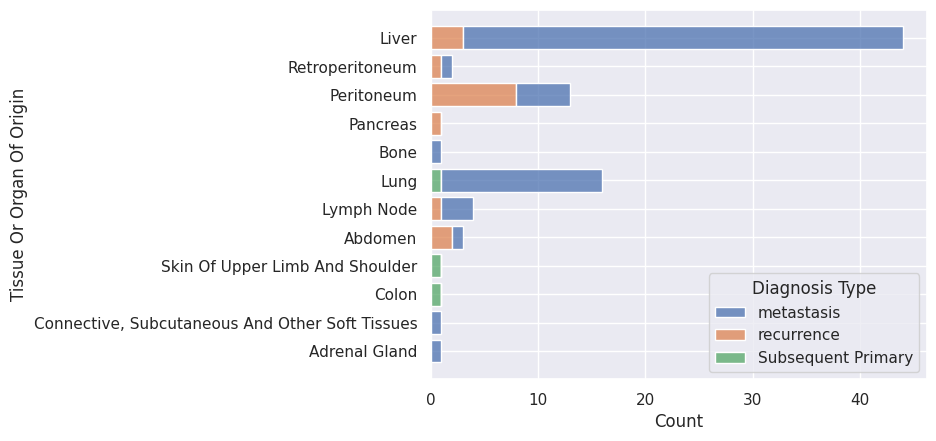

In [128]:
sns.histplot(data=diagnosis_other, y='Tissue Or Organ Of Origin', hue='Diagnosis Type', multiple='stack', shrink=0.8)
plt.show()

## 5. Análisis exploratorio de diagnosis_type

In [129]:
# Muestra de los datos.
diagnosis_type.head()

,Patient Id,Prior Primary,Primary,Recurrence,Metastasis,Subsequent Primary,Total
0,TCGA-IB-7897,No,Yes,Yes,Yes,No,3
1,TCGA-HZ-8315,No,Yes,No,No,No,1
2,TCGA-HZ-8636,No,Yes,No,No,No,1
3,TCGA-IB-7888,No,Yes,No,Yes,No,2
4,TCGA-IB-7893,No,Yes,No,Yes,No,2


In [130]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
diagnosis_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Patient Id          185 non-null    object
 1   Prior Primary       185 non-null    object
 2   Primary             185 non-null    object
 3   Recurrence          185 non-null    object
 4   Metastasis          185 non-null    object
 5   Subsequent Primary  185 non-null    object
 6   Total               185 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 10.2+ KB


In [131]:
# Realizamos una descripción estadística básica de las variables.
diagnosis_type.describe(include='all')

,Patient Id,Prior Primary,Primary,Recurrence,Metastasis,Subsequent Primary,Total
count,185,185,185,185,185,185,185.000000
unique,185,2,1,2,2,2,NaN
top,TCGA-IB-7897,No,Yes,No,No,No,NaN
freq,1,166,185,160,121,182,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.600000
std,NaN,NaN,NaN,NaN,NaN,NaN,0.627278
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


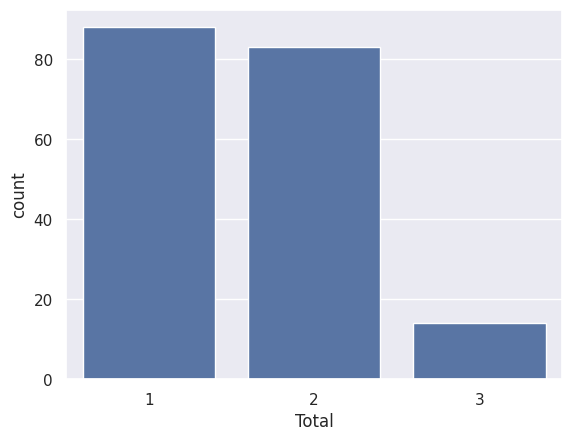

In [132]:
sns.countplot(data=diagnosis_type, x='Total')
plt.show()

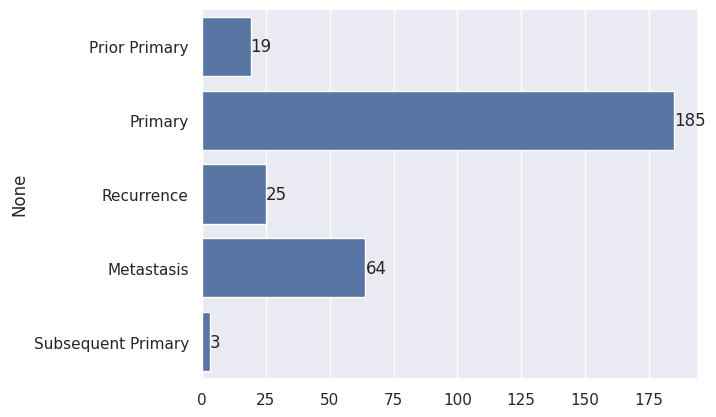

In [133]:
diagnosis_count = []
for col in diagnosis_type.columns[1:-1]:
      diagnosis_count.append(diagnosis_type[diagnosis_type[col] != 'No'].shape[0])

ax = sns.barplot(y=diagnosis_type.columns[1:-1], x=diagnosis_count)
ax.bar_label(ax.containers[0])
plt.show()

## 6. Análisis exploratorio de treatment_ebrt

In [134]:
# Muestra de los datos.
treatment_ebrt.head()

,Patient Id,Treatment Duration,Number Of Fractions,Treatment Anatomic Sites,Treatment Dose (cGy),Outcome
0,TCGA-FB-AAPP,166.0,25.0,Primary Tumor Field,4500.0,Progressive Disease
1,TCGA-HZ-7289,467.0,NaN,Distant Site,4500.0,Progressive Disease
2,TCGA-HZ-7920,120.0,28.0,Primary Tumor Field,5040.0,Complete Response
3,TCGA-F2-A44G,144.0,28.0,Primary Tumor Field,5440.0,Complete Response
4,TCGA-HZ-A49I,93.0,25.0,Primary Tumor Field,5040.0,Progressive Disease


In [135]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
treatment_ebrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient Id                41 non-null     object 
 1   Treatment Duration        40 non-null     float64
 2   Number Of Fractions       34 non-null     float64
 3   Treatment Anatomic Sites  41 non-null     object 
 4   Treatment Dose (cGy)      38 non-null     float64
 5   Outcome                   26 non-null     object 
dtypes: float64(3), object(3)
memory usage: 2.1+ KB


In [136]:
# Realizamos una descripción estadística básica de las variables.
treatment_ebrt.describe(include='all')

,Patient Id,Treatment Duration,Number Of Fractions,Treatment Anatomic Sites,Treatment Dose (cGy),Outcome
count,41,40.000000,34.000000,41,38.000000,26
unique,41,NaN,NaN,3,NaN,3
top,TCGA-FB-AAPP,NaN,NaN,Primary Tumor Field,NaN,Complete Response
freq,1,NaN,NaN,33,NaN,14
mean,NaN,171.825000,26.029412,NaN,4876.052632,NaN
std,NaN,93.648521,5.322823,NaN,633.879260,NaN
min,NaN,77.000000,5.000000,NaN,2000.000000,NaN
25%,NaN,119.750000,25.000000,NaN,5000.000000,NaN
50%,NaN,143.000000,28.000000,NaN,5040.000000,NaN
75%,NaN,201.250000,28.000000,NaN,5040.000000,NaN


In [137]:
treatment_ebrt['Outcome'] = pd.Categorical(treatment_ebrt['Outcome'],
                                            categories=['Progressive Disease',
                                                        'Stable Disease',
                                                        'Complete Response'],
                                            ordered=True)

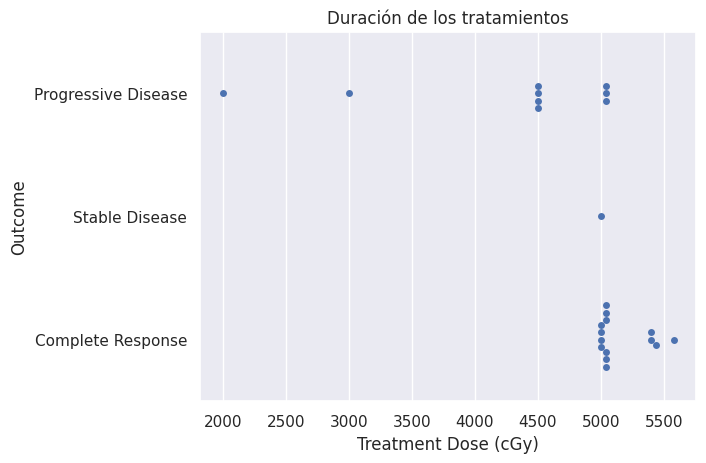

In [138]:
sns.swarmplot(data=treatment_ebrt, x='Treatment Dose (cGy)', y='Outcome')

plt.title('Duración de los tratamientos')

plt.show()

In [139]:
columns = ['Outcome']

table_treatment_ebrt = TableOne(treatment_ebrt, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

print(table_treatment_ebrt.tabulate(tablefmt="fancy_grid"))

╒════════════════╤═════════════════════╤═══════════╕
│                │                     │ Overall   │
╞════════════════╪═════════════════════╪═══════════╡
│ n              │                     │ 41        │
├────────────────┼─────────────────────┼───────────┤
│ Outcome, n (%) │ Progressive Disease │ 10 (24.4) │
├────────────────┼─────────────────────┼───────────┤
│                │ Stable Disease      │ 2 (4.9)   │
├────────────────┼─────────────────────┼───────────┤
│                │ Complete Response   │ 14 (34.1) │
├────────────────┼─────────────────────┼───────────┤
│                │ None                │ 15 (36.6) │
╘════════════════╧═════════════════════╧═══════════╛


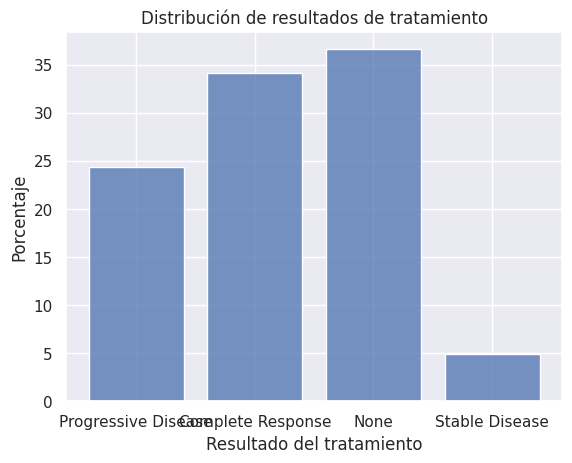

In [140]:
sns.histplot(data=treatment_ebrt, x='Outcome', stat='percent', shrink=0.8)

plt.title('Distribución de resultados de tratamiento')
plt.xlabel('Resultado del tratamiento')
plt.ylabel('Porcentaje')
plt.show()

## 7. Análisis exploratorio de treatment_chemo

In [141]:
# Muestra de los datos.
treatment_chemo.head()

,Patient Id,Outcome,Treatment Duration,Agents,Treatment Type
0,TCGA-2L-AAQA,Progressive Disease,126.0,Gemcitabine,Monotherapy
1,TCGA-2L-AAQE,Progressive Disease,NaN,Gemcitabine,Monotherapy
2,TCGA-2L-AAQI,Progressive Disease,72.0,Gemcitabine,Monotherapy
3,TCGA-2L-AAQJ,Progressive Disease,171.0,Gemcitabine,Monotherapy
4,TCGA-3A-A9I5,Complete Response,211.0,Fluorouracil Leucovorin Gemcitabine,Combination


In [142]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
treatment_chemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient Id          119 non-null    object 
 1   Outcome             112 non-null    object 
 2   Treatment Duration  100 non-null    float64
 3   Agents              119 non-null    object 
 4   Treatment Type      119 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.8+ KB


In [143]:
# Realizamos una descripción estadística básica de las variables.
treatment_chemo.describe(include='all')

,Patient Id,Outcome,Treatment Duration,Agents,Treatment Type
count,119,112,100.000000,119,119
unique,92,5,NaN,16,2
top,TCGA-IB-7645,Progressive Disease,NaN,Gemcitabine,Monotherapy
freq,4,49,NaN,67,75
mean,NaN,NaN,333.020000,NaN,NaN
std,NaN,NaN,298.387281,NaN,NaN
min,NaN,NaN,21.000000,NaN,NaN
25%,NaN,NaN,165.750000,NaN,NaN
50%,NaN,NaN,225.000000,NaN,NaN
75%,NaN,NaN,353.750000,NaN,NaN


In [144]:
treatment_chemo['Outcome'] = pd.Categorical(treatment_chemo['Outcome'],
                                            categories=['Treatment Ongoing',
                                                        'Progressive Disease',
                                                        'Stable Disease',
                                                        'Partial Response',
                                                        'Complete Response'],
                                            ordered=True)

In [145]:
year = diagnosis_primary[['Patient Id', 'Year Of Diagnosis']].copy()
treatment_chemo = treatment_chemo.merge(year, on='Patient Id', how='left')

Text(0.5, 1.0, 'Distribución de resultados de tratamiento')

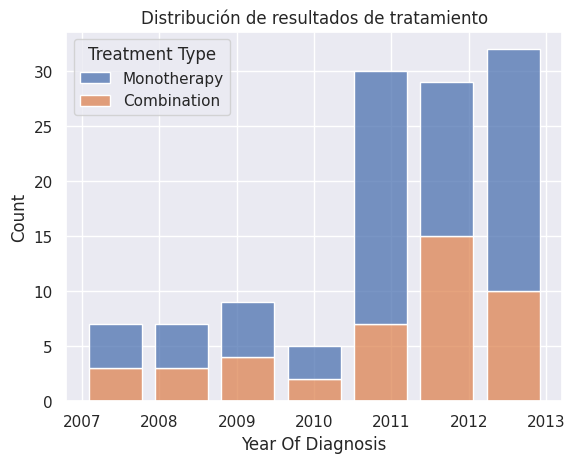

In [146]:
sns.histplot(data=treatment_chemo, x='Year Of Diagnosis', hue='Treatment Type', multiple='stack', shrink=0.8, bins=7)

plt.title('Distribución de resultados de tratamiento')

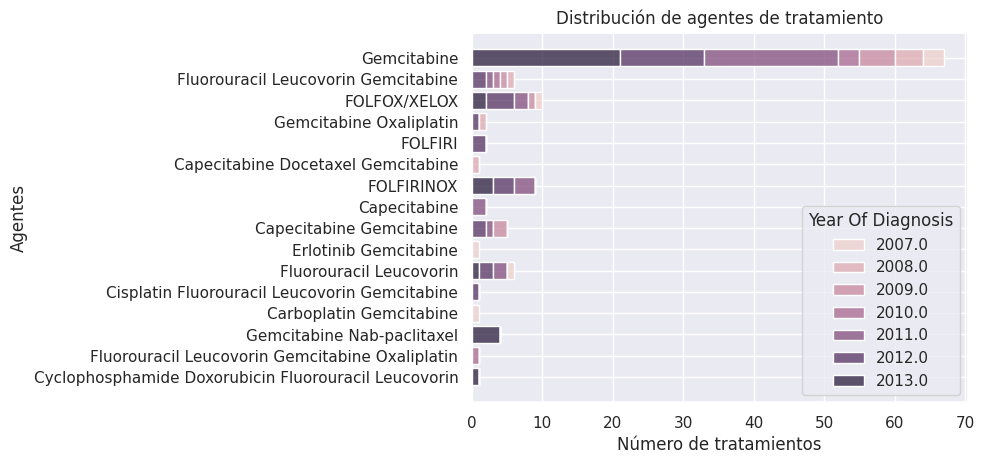

In [147]:
sns.histplot(data=treatment_chemo, y='Agents',
              #order=treatment_chemo['Agents'].value_counts().index,
              hue='Year Of Diagnosis', multiple='stack', shrink=0.8)

plt.title('Distribución de agentes de tratamiento')

#plt.legend(title='Tipo de tratamiento', loc=4)
plt.ylabel('Agentes')
plt.xlabel('Número de tratamientos')
plt.show()

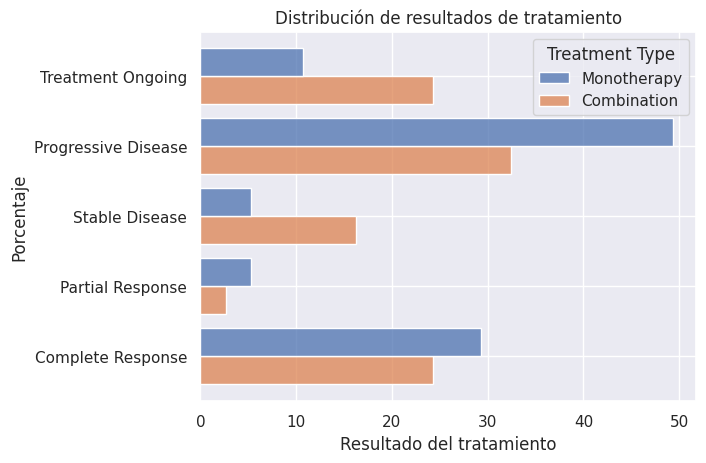

In [148]:
sns.histplot(data=treatment_chemo, y='Outcome', hue='Treatment Type',
             multiple='dodge', shrink=0.8, stat='percent', common_norm=False)


plt.title('Distribución de resultados de tratamiento')
plt.xlabel('Resultado del tratamiento')
plt.ylabel('Porcentaje')
plt.show()

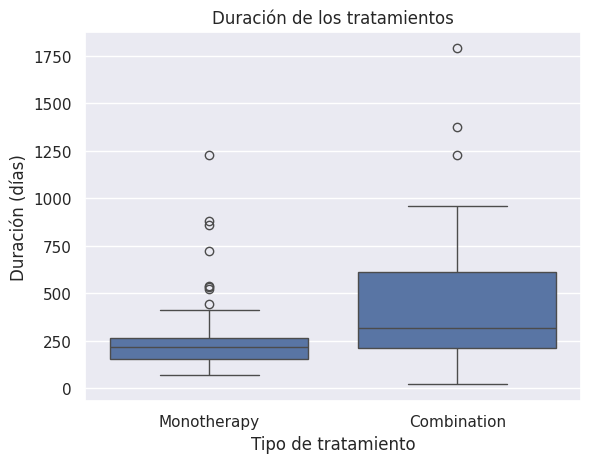

In [149]:
sns.boxplot(data=treatment_chemo, x='Treatment Type', y='Treatment Duration')

plt.title('Duración de los tratamientos')
plt.xlabel('Tipo de tratamiento')
plt.ylabel('Duración (días)')
plt.show()

## 8. Análisis exploratorio de treatment_type

In [150]:
# Muestra de los datos.
treatment_type.head()

,Patient Id,EBRT,Chemotherapy,Adjuvant,Pancreatectomy,Surgery,Pharmaceutical Therapy,Radiation Therapy,Whipple,Other,Total
0,TCGA-IB-7897,No,No,Pharmaceutical Radiation,No,Yes,Yes,Yes,Yes,No,5
1,TCGA-HZ-8315,No,No,Pharmaceutical Radiation,No,No,No,No,Yes,No,2
2,TCGA-HZ-8636,No,No,Pharmaceutical Radiation,No,Yes,No,No,No,No,2
3,TCGA-IB-7888,No,Yes,Radiation,No,Yes,Yes,Yes,Yes,No,6
4,TCGA-IB-7893,No,No,Pharmaceutical Radiation,Distal Pancreatectomy,Yes,Yes,Yes,No,No,5


In [151]:
# Comprobamos la presencia de valores nulos y
# el tipo de datos de cada columna.
treatment_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Patient Id              185 non-null    object
 1   EBRT                    185 non-null    object
 2   Chemotherapy            185 non-null    object
 3   Adjuvant                185 non-null    object
 4   Pancreatectomy          185 non-null    object
 5   Surgery                 185 non-null    object
 6   Pharmaceutical Therapy  185 non-null    object
 7   Radiation Therapy       185 non-null    object
 8   Whipple                 185 non-null    object
 9   Other                   185 non-null    object
 10  Total                   185 non-null    int64 
dtypes: int64(1), object(10)
memory usage: 16.0+ KB


In [152]:
# Realizamos una descripción estadística básica de las variables.
treatment_type.describe(include='all')

,Patient Id,EBRT,Chemotherapy,Adjuvant,Pancreatectomy,Surgery,Pharmaceutical Therapy,Radiation Therapy,Whipple,Other,Total
count,185,185,185,185,185,185,185,185,185,185,185.000000
unique,185,2,2,4,3,2,2,2,2,4,NaN
top,TCGA-IB-7897,No,No,Radiation,No,Yes,Yes,Yes,Yes,No,NaN
freq,1,144,93,77,158,103,96,96,143,182,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.010811
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.638495
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


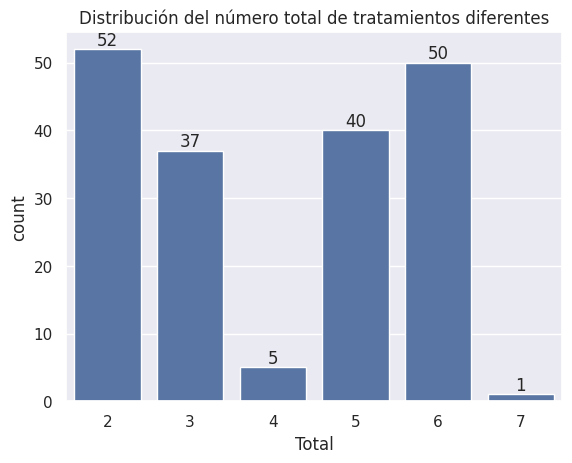

In [153]:
ax = sns.countplot(data=treatment_type, x='Total')
ax.bar_label(ax.containers[0])

plt.title('Distribución del número total de tratamientos diferentes')
plt.show()

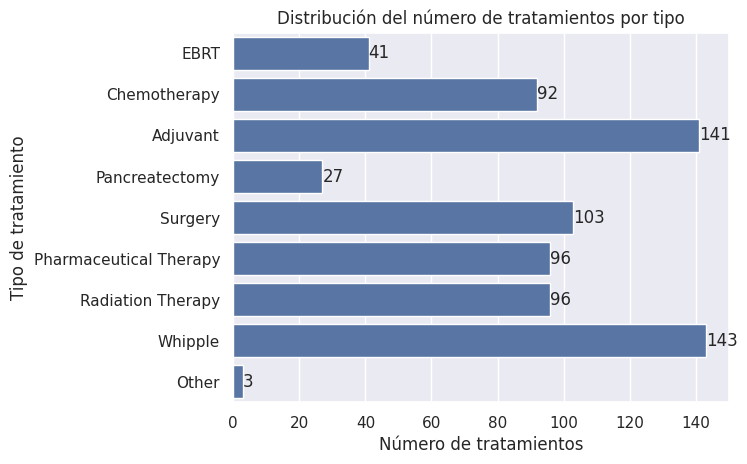

In [154]:
treatment_count = []
for col in treatment_type.columns[1:-1]:
      treatment_count.append(treatment_type[treatment_type[col] != 'No'].shape[0])

ax = sns.barplot(y=treatment_type.columns[1:-1], x=treatment_count)
ax.bar_label(ax.containers[0])

plt.xlabel('Número de tratamientos')
plt.ylabel('Tipo de tratamiento')
plt.title('Distribución del número de tratamientos por tipo')
plt.show()

In [155]:
columns = ['Adjuvant', 'Pancreatectomy', 'Other']

table_treatment_type = TableOne(treatment_type, columns=columns,
                                categorical=columns, pval=False,
                                missing=False)

print(table_treatment_type.tabulate(tablefmt="fancy_grid"))

╒═══════════════════════╤═════════════════════════════════════════════════════╤════════════╕
│                       │                                                     │ Overall    │
╞═══════════════════════╪═════════════════════════════════════════════════════╪════════════╡
│ n                     │                                                     │ 185        │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│ Adjuvant, n (%)       │ No                                                  │ 44 (23.8)  │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│                       │ Pharmaceutical                                      │ 1 (0.5)    │
├───────────────────────┼─────────────────────────────────────────────────────┼────────────┤
│                       │ Pharmaceutical Radiation                            │ 63 (34.1)  │
├───────────────────────┼─────────────────────────────────────────────

## 9. Análisis exploratorio de mutation

In [156]:
mutation_gene.set_index('Gene', inplace=True)
mutation_gene.head(10)

,TCGA-3A-A9IU,TCGA-IB-7651,TCGA-2L-AAQA,TCGA-2J-AABF,TCGA-H8-A6C1,TCGA-XN-A8T5,TCGA-LB-A8F3,TCGA-FZ-5919,TCGA-HV-A7OL,TCGA-2J-AAB4,TCGA-2L-AAQI,TCGA-FB-A78T,TCGA-HZ-8637,TCGA-HZ-A8P0,TCGA-RB-AA9M,TCGA-IB-AAUR,TCGA-Q3-AA2A,TCGA-FB-AAQ1,TCGA-IB-8126,TCGA-IB-AAUN,TCGA-US-A776,TCGA-YB-A89D,TCGA-2L-AAQJ,TCGA-FB-AAPU,TCGA-IB-A5SP,TCGA-RB-A7B8,TCGA-FB-AAQ0,TCGA-IB-A5SO,TCGA-HV-A7OP,TCGA-LB-A7SX,TCGA-LB-A9Q5,TCGA-YY-A8LH,TCGA-3A-A9IS,TCGA-XN-A8T3,TCGA-HZ-A8P1,TCGA-HV-AA8V,TCGA-2J-AAB1,TCGA-XD-AAUI,TCGA-2J-AAB9,TCGA-2J-AABH,TCGA-2J-AABP,TCGA-3A-A9I5,TCGA-FZ-5921,TCGA-HZ-A77P,TCGA-IB-A5ST,TCGA-IB-AAUU,TCGA-3A-A9J0,TCGA-2L-AAQE,TCGA-3A-A9I9,TCGA-2J-AABO,TCGA-FZ-5920,TCGA-FB-A5VM,TCGA-RL-AAAS,TCGA-FB-AAQ6,TCGA-HZ-A77Q,TCGA-FZ-5923,TCGA-2J-AABE,TCGA-3A-A9IJ,TCGA-3A-A9IZ,TCGA-3A-A9IH,TCGA-IB-7885,TCGA-FB-AAPZ,TCGA-YH-A8SY,TCGA-HZ-A9TJ,TCGA-US-A77J,TCGA-3A-A9IO,TCGA-HV-AA8X,TCGA-F2-A7TX,TCGA-2J-AABA,TCGA-3E-AAAY,TCGA-FZ-5922,TCGA-IB-A5SQ,TCGA-IB-A6UG,TCGA-OE-A75W,TCGA-3A-A9IB,TCGA-IB-A5SS,TCGA-US-A77G,TCGA-S4-A8RO,TCGA-IB-A7M4,TCGA-2J-AAB8,TCGA-2J-AABV,TCGA-XD-AAUG,TCGA-Z5-AAPL,TCGA-FB-AAPS,TCGA-2L-AAQM,TCGA-HZ-A77O,TCGA-FB-AAPP,TCGA-FB-AAQ2,TCGA-2L-AAQL,TCGA-IB-A7LX,TCGA-IB-AAUQ,TCGA-XD-AAUL,TCGA-2J-AABU,TCGA-US-A779,TCGA-2J-AABT,TCGA-IB-AAUS,TCGA-F2-7273,TCGA-FB-AAPQ,TCGA-IB-AAUO,TCGA-FZ-5926,TCGA-HZ-7925,TCGA-US-A77E,TCGA-IB-7652,TCGA-F2-A8YN,TCGA-3A-A9IC,TCGA-IB-AAUM,TCGA-HZ-7918,TCGA-Q3-A5QY,TCGA-IB-A6UF,TCGA-3A-A9IX,TCGA-IB-AAUW,TCGA-2J-AABR,TCGA-IB-AAUP,TCGA-3E-AAAZ,TCGA-XD-AAUH,TCGA-3A-A9IL,TCGA-2J-AABK,TCGA-3A-A9IV,TCGA-IB-AAUV,TCGA-2J-AAB6,TCGA-3A-A9I7,TCGA-HZ-A49I,TCGA-FB-AAQ3,TCGA-FZ-5924,TCGA-F2-A44G,TCGA-3A-A9IR,Total,Total %
Gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KRAS,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,0,100,79.365079
TP53,1,0,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,0,1,1,1,0,0,81,64.285714
TTN,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,44,34.920635
MAMLD1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,28,22.222222
CDKN2A,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,27,21.428571
SMAD4,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,26,20.634921
FAM47C,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,16.666667
MAGEC1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,16.666667
TMC4,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,

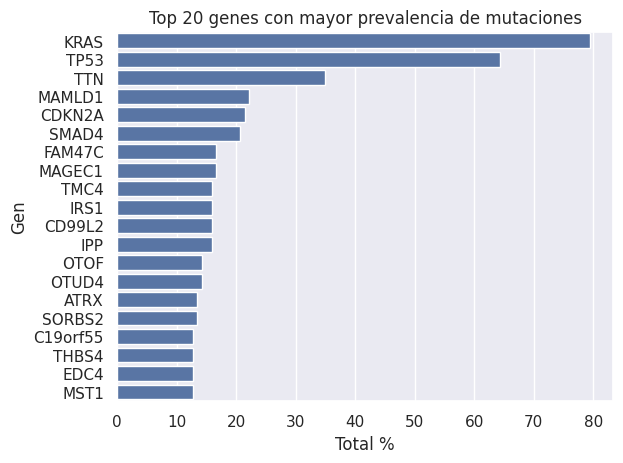

In [157]:
sns.barplot(data=mutation_gene.head(20), y='Gene', x='Total %')

plt.title('Top 20 genes con mayor prevalencia de mutaciones')
plt.ylabel('Gen')
plt.show()

In [158]:
def comutations(mutation):
    comutation = mutation_gene.loc[:, mutation_gene.loc[mutation] == 1]\
      .loc[mutation_gene.index != mutation, :]\
      .sum(axis=1) * 100 / mutation_gene.loc[mutation, 'Total']

    comutation = comutation.sort_values(ascending=False).head(20)
    comutation = pd.DataFrame(comutation)
    comutation.columns = ['Total_co %']
    comutation['Total'] = mutation_gene.loc[comutation.index, 'Total']

    sns.barplot(y=comutation.index, x=comutation['Total_co %'], alpha=0.8)
    sns.barplot(y=comutation.index, x=comutation['Total'], alpha=0.8)

    plt.title(f'Top 20 genes con co-mutaciones con {mutation}')
    plt.ylabel('Gen')
    plt.xlabel('Total % de co-mutaciones')
    plt.show()

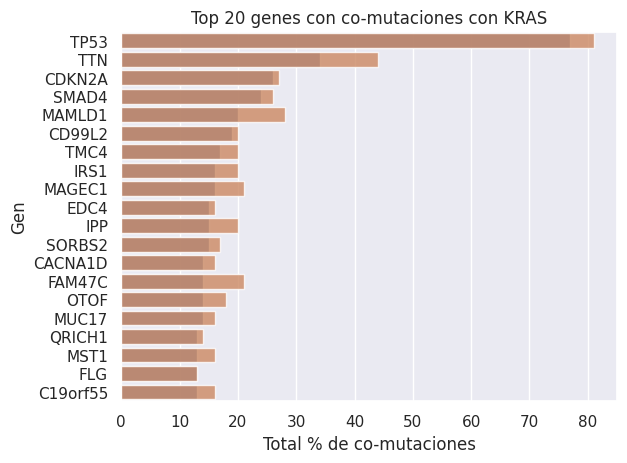

In [159]:
comutations('KRAS')

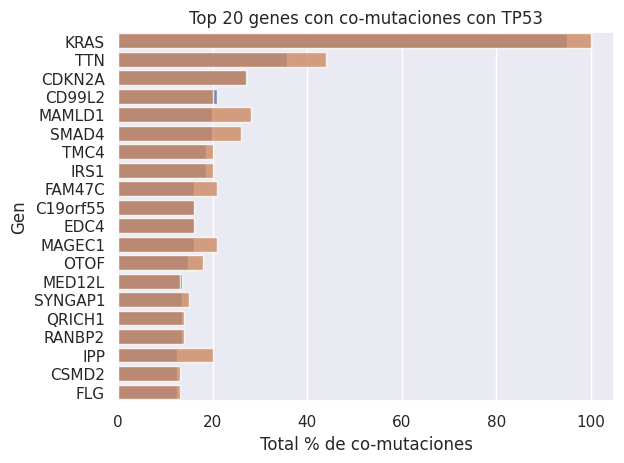

In [160]:
comutations('TP53')

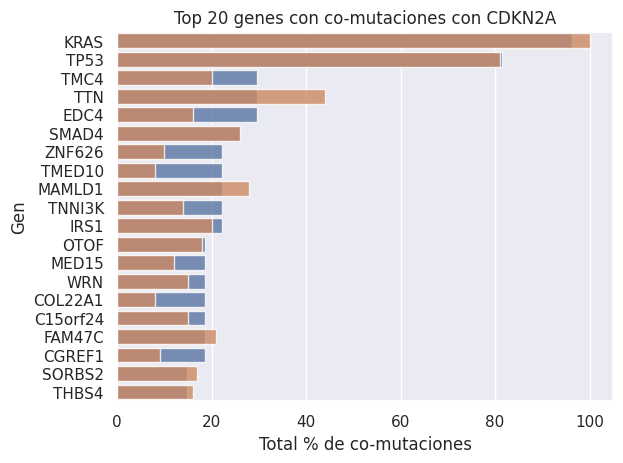

In [161]:
comutations('CDKN2A')

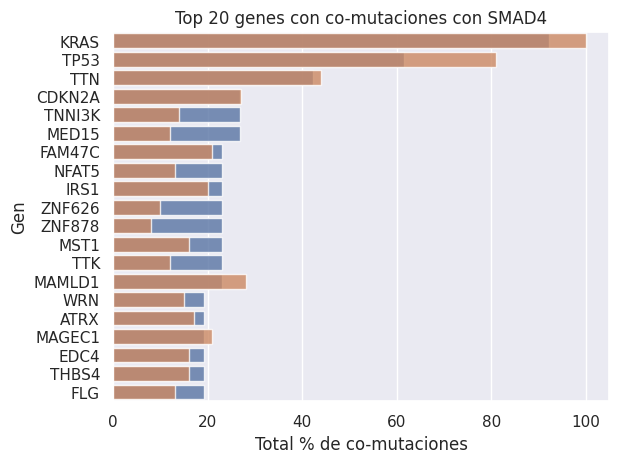

In [162]:
comutations('SMAD4')

##